In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm

sys.path.append("..")

In [2]:
from manage_data import get_conditions, load_result, delete_all, delete_result

In [4]:
df = load_result(conditions=get_conditions(
    N_particle = None,
    N_ensemble = None,
    velocity = None,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = None
    )
)

df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,average,std,time
0,a7e396,10000,100,1.0,0.01,5.0,40,1.0,0.46,1.0,1.0,1.0,0.01,10000,10000,0.001684,0.203105,5607.067723
1,cc66c3,10000,100,1.0,0.14,5.0,40,1.0,0.42,1.0,1.0,1.0,0.01,10000,10000,0.046927,0.699838,4733.477971
2,35d9c4,10000,100,1.0,0.02,5.0,40,1.0,0.49,1.0,1.0,1.0,0.01,10000,10000,-0.002917,0.309086,4272.436902
3,cd796f,10000,100,1.0,0.07,5.0,40,1.0,0.46,1.0,1.0,1.0,0.01,10000,10000,0.005169,0.542483,4224.981955
4,803550,10000,100,1.0,0.06,5.0,40,1.0,0.37,1.0,1.0,1.0,0.01,10000,10000,-0.002275,0.402026,5313.219726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,52ce7a,10000,100,1.0,0.01,5.0,40,1.0,0.42,1.0,1.0,1.0,0.01,10000,10000,0.002772,0.188234,5657.768309
796,9ad63a,10000,100,1.0,0.10,5.0,40,1.0,0.24,1.0,1.0,1.0,0.01,10000,10000,0.005194,0.337713,5351.704331
797,5103c7,10000,100,1.0,0.03,5.0,40,1.0,0.15,1.0,1.0,1.0,0.01,10000,10000,-0.000351,0.114688,5360.721109
798,c8deb2,10000,100,1.0,0.09,5.0,40,1.0,0.11,1.0,1.0,1.0,0.01,10000,10000,-0.002372,0.147926,4237.534717


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['a7e396', 'cc66c3', '35d9c4', 'cd796f', '803550', '5348c3', '67fd90', '3f9cdb', 'd2675f', '7f44d2', 'fee416', 'a680de', 'd979de', '670364', 'ee23bc', '7c944a', '649066', '0da0ab', '1bf8ff', '33e122', 'd6c04f', '684ce5', '55d5d7', '4212b7', '141eee', 'b1863d', 'f08dd5', '342896', '03373a', '68d2a1', 'dabc50', '80a247', 'de7316', 'c9d82d', 'a78fdc', '13274c', '2ab2fb', '82877c', '42cc9d', 'e03587', 'd662c6', '79d4c0', 'c3db0a', '3c01e8', 'c0703f', '9edbb2', 'a28ef3', '2ea40a', '0eaa65', '321f34', '6bd6c5', '5c30cb', '830f68', '19f1bb', 'caca86', 'a1b0e1', '8ee1fa', '127ce4', 'cf13ad', '4f982c', 'eeb083', 'ad20ea', '66b821', '568f58', '4000c1', 'bd1f9b', '19c6d9', '3af451', '9aefd6', '0a4bd8', '7b7119', '6b86a3', 'aa4e8d', '81cdfc', 'fa3501', 'ac16cf', 'c11992', 'e3164e', '63c71e', '56af6a', '3bf5fc', '479dcd', '5cc404', '5d2372', '0cf0e5', '38a988', '321cc2', '26cbc4', '6d4652', '6e99cd', '846a0f', 'ece906', 'fc3e53', '6645d3', 'e786f4', '75b0a9', 'a1605c', 'f65edb', 'b143b6', 'a982a5',

In [6]:
# delete_all()

setting deleted: 800, data deleted: 800


In [6]:
x, y = sorted(set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy()))
print(f"{x=}, {y=}")

x=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5], y=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]


In [7]:
averages, stds = np.zeros((len(x), len(y))), np.zeros((len(x), len(y)))

for i, slope in enumerate(x):
    for j, Lambda in enumerate(y):
        conditions = get_conditions(slope=slope, Lambda=Lambda)
        average = df.query(" and ".join(conditions))["average"].to_numpy()
        std = df.query(" and ".join(conditions))["std"].to_numpy()
        
        if len(average) == 0: continue
        else:
            averages[i,j] = average[0]
            stds[i,j] = std[0]

averages = np.transpose(averages)
stds = np.transpose(stds)
# print(data)

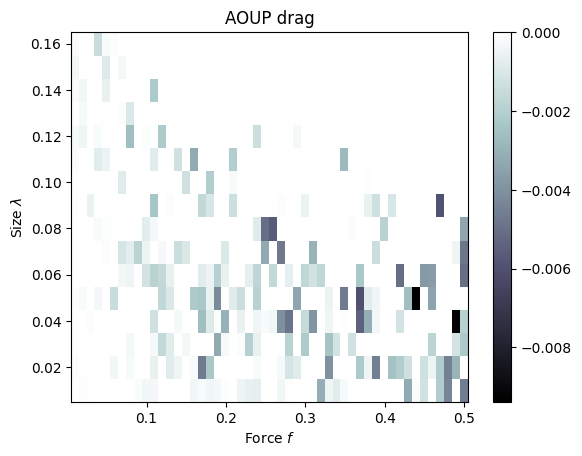

In [8]:
fig, ax = plt.subplots()

c = ax.pcolor(x, y, averages, shading='auto',
               norm=Normalize(vmin=averages.min(), vmax=0.0), cmap="bone")

fig.colorbar(c, ax=ax)

ax.set_title("AOUP drag")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

plt.show()

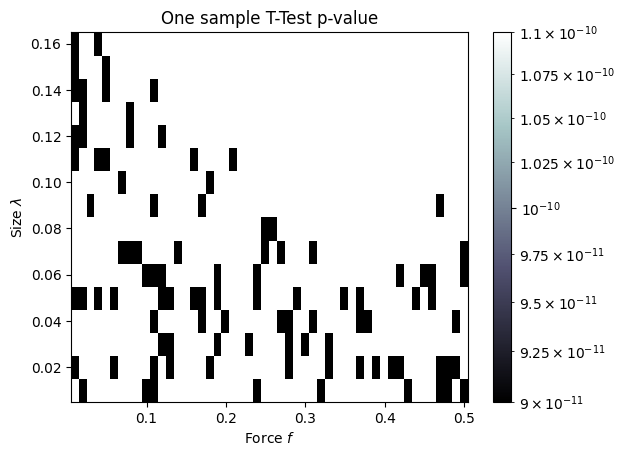

In [19]:
from scipy.stats import norm

Z = (averages - 0) / (stds / np.sqrt(df["sampling"].iloc[0]*100))
Z[np.isnan(Z)] = 0.0

p_value = norm.cdf(Z)

fig, ax = plt.subplots()

c = ax.pcolor(x, y, p_value, shading='auto',
               norm=LogNorm(vmin=1.e-10, vmax=1.e-10), cmap="bone")

fig.colorbar(c, ax=ax)

ax.set_title("One sample T-Test p-value")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

plt.show()